In [1]:
from scipy import stats
import numpy as np
import pandas as pd

from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Chi-square test

  - dados numéricos e discretos
  - comparação de 2 ou mais distribuições
    - p.ex. número de escamas de cobras fêmeas, de mesma espécie, em altitudes diferentes
    - são estatisticamente diferentes?
    - coletaremos 5 amostras a 1200 m e 5 amostras a 200 m

### Exemplo 01 - medicina

  - tabela de contingência

In [2]:
# testes x estado de pacientes
cases = np.array([[10, 4], [3, 29]]).T
dfc = pd.DataFrame(cases)
dfc.columns = ['são', 'doente']
dfc.index = ["negativo", "positivo"]
dfc

,são,doente
negativo,10,3
positivo,4,29


### Exemplo 02 - ecologia ~ cobras

In [3]:
chi2, pvalue, dof, expected = stats.chi2_contingency(dfc)
chi2, pvalue, dof, expected 

(15.563342907092908,
 7.978656151116845e-05,
 1,
 array([[ 3.95652174,  9.04347826],
        [10.04347826, 22.95652174]]))

In [4]:
# scales = observed data
scales = np.array([[16, 18, 25, 14, 12], [32, 24, 27, 35, 40]]).T
scales

array([[16, 32],
       [18, 24],
       [25, 27],
       [14, 35],
       [12, 40]])

In [5]:
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,32
33,18,24
34,25,27
35,14,35
36,12,40


## Valores observados x Valores esperados

### Pearson

In [6]:
dfa = df.copy()
dfa['tot_marg_escamas'] = dfa.sum(axis = 1)
dfa

,alt1200,alt200,tot_marg_escamas
32,16,32,48
33,18,24,42
34,25,27,52
35,14,35,49
36,12,40,52


In [7]:
dfa.sum(axis = 0)

alt1200              85
alt200              158
tot_marg_escamas    243
dtype: int64

In [8]:
dfa = dfa.append(pd.DataFrame(dfa.sum(axis = 0)).T)
lista = list(dfa.index)
lista[-1] = 'tot_marg_altitude'
dfa.index = lista
dfa

,alt1200,alt200,tot_marg_escamas
32,16,32,48
33,18,24,42
34,25,27,52
35,14,35,49
36,12,40,52
tot_marg_altitude,85,158,243


In [9]:
dfp = dfa.copy()
nrow, ncol = dfp.shape
tot_animal = dfp.iloc[nrow-1, ncol-1]
dfp = dfp / tot_animal
print('tot animal', tot_animal)
dfp

tot animal 243


,alt1200,alt200,tot_marg_escamas
32,0.065844,0.131687,0.197531
33,0.074074,0.098765,0.172840
34,0.102881,0.111111,0.213992
35,0.057613,0.144033,0.201646
36,0.049383,0.164609,0.213992
tot_marg_altitude,0.349794,0.650206,1.000000


### A multiplicação dos valores marginais coluna (j) x marginais linha (i) é o valor esperado de uma célula (i,j)

In [10]:
dfexp  = dfp.copy()

pos_tot_marg_escamas  = ncol - 1
pos_tot_marg_altitude = nrow - 1
print(pos_tot_marg_escamas, pos_tot_marg_altitude, "\n")

for i in range(nrow):
    for j in range(ncol):
        dfexp.iloc[i, j] = dfp.iloc[i, pos_tot_marg_escamas] * dfp.iloc[pos_tot_marg_altitude, j]
        
dfexp

2 5 



,alt1200,alt200,tot_marg_escamas
32,0.069095,0.128436,0.197531
33,0.060458,0.112381,0.172840
34,0.074853,0.139139,0.213992
35,0.070535,0.131111,0.201646
36,0.074853,0.139139,0.213992
tot_marg_altitude,0.349794,0.650206,1.000000


In [11]:
dfexp2 = dfexp.copy()
(dfexp2*tot_animal).round(2)

,alt1200,alt200,tot_marg_escamas
32,16.79,31.21,48.0
33,14.69,27.31,42.0
34,18.19,33.81,52.0
35,17.14,31.86,49.0
36,18.19,33.81,52.0
tot_marg_altitude,85.00,158.00,243.0


In [12]:
dfexp2 = dfexp.copy()
dfexp2 = (dfexp2*tot_animal).round(0).astype(int)
dfexp2

,alt1200,alt200,tot_marg_escamas
32,17,31,48
33,15,27,42
34,18,34,52
35,17,32,49
36,18,34,52
tot_marg_altitude,85,158,243


In [13]:
df

,alt1200,alt200
32,16,32
33,18,24
34,25,27
35,14,35
36,12,40


In [14]:
dfexp3 = dfexp2.copy()
dfexp3 = dfexp2.iloc[:5, :2]
dfexp3

,alt1200,alt200
32,17,31
33,15,27
34,18,34
35,17,32
36,18,34


In [15]:
df - dfexp3

,alt1200,alt200
32,-1,1
33,3,-3
34,7,-7
35,-3,3
36,-6,6


In [16]:
(df - dfexp3)**2

,alt1200,alt200
32,1,1
33,9,9
34,49,49
35,9,9
36,36,36


In [17]:
(df - dfexp3)**2 / dfexp3

,alt1200,alt200
32,0.058824,0.032258
33,0.600000,0.333333
34,2.722222,1.441176
35,0.529412,0.281250
36,2.000000,1.058824


In [18]:
chi2 = np.sum(np.sum((df - dfexp3)**2 / dfexp3))
chi2

9.057298914189332

### Dataframe == tabela de contingência

In [19]:
chi2, pvalue, dof, expected = stats.chi2_contingency(df)
chi2, pvalue, dof, expected 

(9.248974127138686,
 0.055168821766874876,
 4,
 array([[16.79012346, 31.20987654],
        [14.69135802, 27.30864198],
        [18.18930041, 33.81069959],
        [17.1399177 , 31.8600823 ],
        [18.18930041, 33.81069959]]))

In [20]:
"estatística de chi-quadrado %.3f, p-value=%.3e, degree of freedom (dof) = %d"%(chi2, pvalue, dof)

'estatística de chi-quadrado 9.249, p-value=5.517e-02, degree of freedom (dof) = 4'

In [21]:
df

,alt1200,alt200
32,16,32
33,18,24
34,25,27
35,14,35
36,12,40


In [22]:
expected.round(2)

array([[16.79, 31.21],
       [14.69, 27.31],
       [18.19, 33.81],
       [17.14, 31.86],
       [18.19, 33.81]])

In [23]:
scales - expected

array([[-0.79012346,  0.79012346],
       [ 3.30864198, -3.30864198],
       [ 6.81069959, -6.81069959],
       [-3.1399177 ,  3.1399177 ],
       [-6.18930041,  6.18930041]])

### Se a distribuição observada (df) similar à calculada ~ erro próximo de zero

In [24]:
erro = np.sum((scales - expected)**2)
erro

212.2471168013006

### A definição de estatística de chi-quadrado
### soma (observado - esperado)**2 / esperado

In [25]:
chis_stat = np.sum((scales - expected)**2/expected)
chis_stat

9.248974127138686

### Valores experados não se distanciam muito dos observados?

  - não: então as distribuições são similares:     H0  --> p-value < 0.05
  - sim: então as distribuições NÃO são similares: Ha --> p-value >= 0.05

In [26]:
pvalue

0.055168821766874876

In [27]:
if pvalue >= 0.05:
    stri = "não se refuta H0: distribuições estatisticamente similares, statistic = %.3f, p-value = %.3e"%(chi2, pvalue)
else:
    stri = "adota-se a Ha: distribuições estatisticamente diferentes, statistic = %.3f, p-value = %.3e"%(chi2, pvalue)    
stri

'não se refuta H0: distribuições estatisticamente similares, statistic = 9.249, p-value = 5.517e-02'

### A tabela de contingência é de 5 linhas x 2 colunas

In [28]:
scales.shape

(5, 2)

### Graus de liberdade

dof = (nrow - 1) * (ncol -1)

In [29]:
dof = (scales.shape[0]-1) * (scales.shape[1]-1)
dof

4

### Dados mais diferentes: distribuições distintas

In [30]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
scales

array([[16, 10],
       [18, 24],
       [16, 27],
       [14, 35],
       [12, 40]])

In [31]:
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,10
33,18,24
34,16,27
35,14,35
36,12,40


In [32]:
stat = stats.chisquare(scales, axis=None)
stat

Power_divergenceResult(statistic=43.0, pvalue=2.1556072340481466e-06)

In [33]:
def chi2_text(df, verbose=True):
    chi2, p, dof, expected = stats.chi2_contingency(df)

    erro = np.sum((df.to_numpy() - expected)**2)

    if p >= 0.05:
        stri = "não se refuta H0: distribuições estatisticamente similares, statistic = %.3f, p-value = %.3e"%(chi2, p)
    else:
        stri = "adota-se a Ha: distribuições estatisticamente diferentes, statistic = %.3f, p-value = %.3e"%(chi2, p)
        
    if verbose:
        stri += "\nErro total = %d\nGraus de liberdade (dof) = %d"%(erro, dof)
        print(stri)
    
    return chi2, p, dof, expected, erro, stri

In [34]:
chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.210, p-value = 1.030e-02
Erro total = 220
Graus de liberdade (dof) = 4


### Simulando um afastamento ...

In [35]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,10
33,18,24
34,16,27
35,14,35
36,12,40


In [36]:
df.alt200 = df.alt200 + 1
df

,alt1200,alt200
32,16,11
33,18,25
34,16,28
35,14,36
36,12,41


### Simulação de ir aumentando a col

In [37]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

for i in range(5):
    print('%d)', i)
    df.alt200 = df.alt200 -1
    chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)
    print('-----------')
    

%d) 0
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.949, p-value = 7.458e-03
Erro total = 227
Graus de liberdade (dof) = 4
-----------
%d) 1
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 14.772, p-value = 5.198e-03
Erro total = 235
Graus de liberdade (dof) = 4
-----------
%d) 2
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 15.691, p-value = 3.464e-03
Erro total = 243
Graus de liberdade (dof) = 4
-----------
%d) 3
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 16.722, p-value = 2.189e-03
Erro total = 251
Graus de liberdade (dof) = 4
-----------
%d) 4
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 17.886, p-value = 1.299e-03
Erro total = 260
Graus de liberdade (dof) = 4
-----------


In [38]:
df

,alt1200,alt200
32,16,5
33,18,19
34,16,22
35,14,30
36,12,35


### Se eu tiver 3 altitude (0m, 200m, 1200m)
### Grau de liberdade vai mudar
### Erro tende a aumentar

In [39]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
print(scales)

df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']


chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

[[16 10]
 [18 24]
 [16 27]
 [14 35]
 [12 40]]
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.210, p-value = 1.030e-02
Erro total = 220
Graus de liberdade (dof) = 4


In [40]:
# scales = observed data
scales = np.array([[16, 15, 14, 12, 15], [16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
print(scales)

df = pd.DataFrame(scales)
df.columns = ['alt0', 'alt1200', 'alt200']

chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

[[16 16 10]
 [15 18 24]
 [14 16 27]
 [12 14 35]
 [15 12 40]]
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 17.159, p-value = 2.850e-02
Erro total = 325
Graus de liberdade (dof) = 8


### Distribuição chi-quadrado

In [41]:
# 2 altitudes
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df1 = pd.DataFrame(scales)
df1.columns = ['alt1200', 'alt200']

# 3 altitudes
scales = np.array([[16, 15, 14, 12, 15], [16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df2 = pd.DataFrame(scales)
df2.columns = ['alt0', 'alt1200', 'alt200']

# 5 altitudes
scales = np.array([[16, 18, 16, 14, 10], 
                   [17, 19, 16, 13, 15],
                   [32, 24, 18, 11, 12],
                   [16, 18, 12, 16, 12],
                   [20, 18, 18, 16, 11]]).T
df3 = pd.DataFrame(scales)
df3.columns = ['alt0', 'alt1', 'alt2', 'alt1200', 'alt200']


0 4 13.209586367265107 blue
1 8 17.158639016745646 green
2 16 9.412990915319478 red


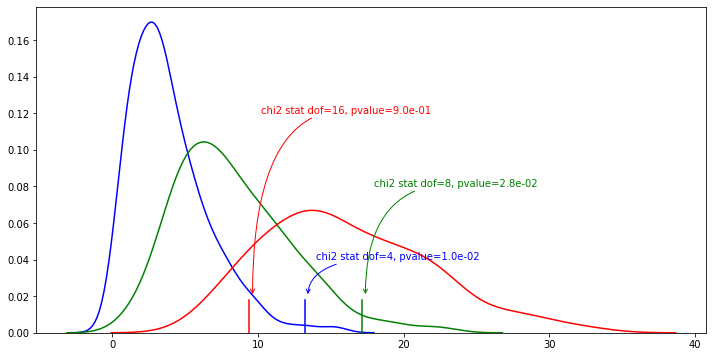

In [42]:
N = 300
colors = ['blue', 'green', 'red']

fig = plt.figure(figsize=(12,6))

for i in range(3):
    if   i == 0: df = df1
    elif i == 1: df = df2
    else:        df = df3
        
    color = colors[i]
    chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=False)
    print(i, dof, chi2, color)

    ax = sns.distplot(np.random.chisquare(df=dof, size=N), hist=False, color=color);


    ax.annotate('chi2 stat dof=%d, pvalue=%.1e'%(dof, p), xy=(chi2+.21, 0.02), xytext=(chi2+.8, 0.04*(i+1)),
                color = color,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90", color=color));
    
    ax.axvline(x=chi2, ymin=0, ymax=.1, color=color)


### Adendo da distribuição de chi-quadrado

(0, 9)

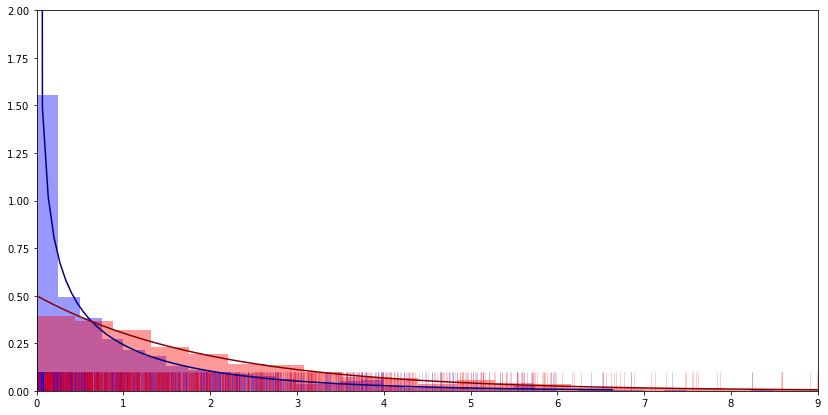

In [43]:
mu = 0
sdv = 1
N = 1000

dist1 = np.random.normal(mu, sdv, N)**2
dist2 = np.random.normal(mu, sdv, N)**2


chi2_2 = dist1 + dist2

plt.figure(figsize=(14,7))
ax = sns.distplot(dist1, color='blue',  hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'blue', "alpha": .2,})
ret = sns.distplot(chi2_2, color='red', hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'red', "alpha": .2,}, ax=ax)

# fit the chi2 distribution
from scipy import stats

df = 1
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='navy')

df = 2
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='darkred')

plt.ylim(0, 2)
plt.xlim(0,9)

(0, 9)

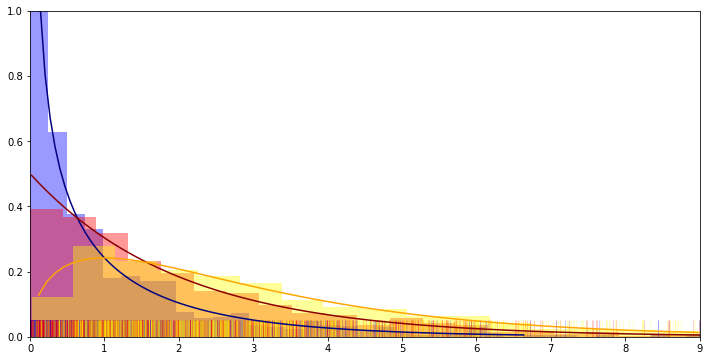

In [44]:
dist3 = np.random.normal(mu, sdv, N)**2

chi2_3 = dist1 + dist2 + dist3

plt.figure(figsize=(12,6))
ax  = sns.distplot(dist2,  color='blue',   hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'blue', "alpha": .2,})
ret = sns.distplot(chi2_2, color='red',    hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'red', "alpha": .2,}, ax=ax)
ret = sns.distplot(chi2_3, color='yellow', hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'yellow', "alpha": .2,}, ax=ax)

df = 1
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='navy')

df = 2
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='darkred')

df = 3
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='orange')

plt.ylim(0, 1)
plt.xlim(0,9)